In [1]:
# Importation des bibliothèques nécessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Importation des données
data = pd.read_csv("data.csv", encoding='ISO-8859-1', sep=';')

data.head(2)

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  hc                 977

In [3]:
# Rennomage des colonnes
data.columns = ["Marque", "Modele_dossier", "Modele_commerciale", "Designation_commerciale", "Code_national_identification_type", "Type_variante_version", 
                "Type_carburant", "Hybride", "Puissance_administrative", "Puissance_maximale", "Type_boit_vitesse_nbre_rapport", "Consommation_urbaine_carburant", 
                "Consommation_mixte_carburant", "Consommation_extra_urbaine_carburant", "Emission_CO2", "Resultat_essai_CO", "Resultat_essai_HC", "Resultat_essai_NOx", 
                "Resultat_essai_HC_NOx", "Resultat_essai_particules", "Masse_en_ordre_marche_mini", "Masse_en_ordre_marche_maxi", "Champ_v9", "Date_derniere_mise_a_jour", 
                "Carroserie", "Gamme", "Sans_nom", "Sans_nom", "Sans_nom", "Sans_nom"]

data.head()

,Marque,Modele_dossier,Modele_commerciale,Designation_commerciale,Code_national_identification_type,Type_variante_version,Type_carburant,Hybride,Puissance_administrative,Puissance_maximale,...,Masse_en_ordre_marche_mini,Masse_en_ordre_marche_maxi,Champ_v9,Date_derniere_mise_a_jour,Carroserie,Gamme,Sans_nom,Sans_nom,Sans_nom,Sans_nom
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [27]:
# Valeurs manquantes
data.isnull().sum()

Marque                                      0
Modele_dossier                              0
Modele_commerciale                          0
Designation_commerciale                     0
Code_national_identification_type           0
Type_variante_version                       0
Type_carburant                              0
Hybride                                     0
Puissance_administrative                    0
Puissance_maximale                          0
Type_boit_vitesse_nbre_rapport              0
Consommation_urbaine_carburant             43
Consommation_mixte_carburant               43
Consommation_extra_urbaine_carburant       34
Emission_CO2                               34
Resultat_essai_CO                         158
Resultat_essai_HC                       45271
Resultat_essai_NOx                        158
Resultat_essai_HC_NOx                    9888
Resultat_essai_particules                2678
Masse_en_ordre_marche_mini                  0
Masse_en_ordre_marche_maxi        

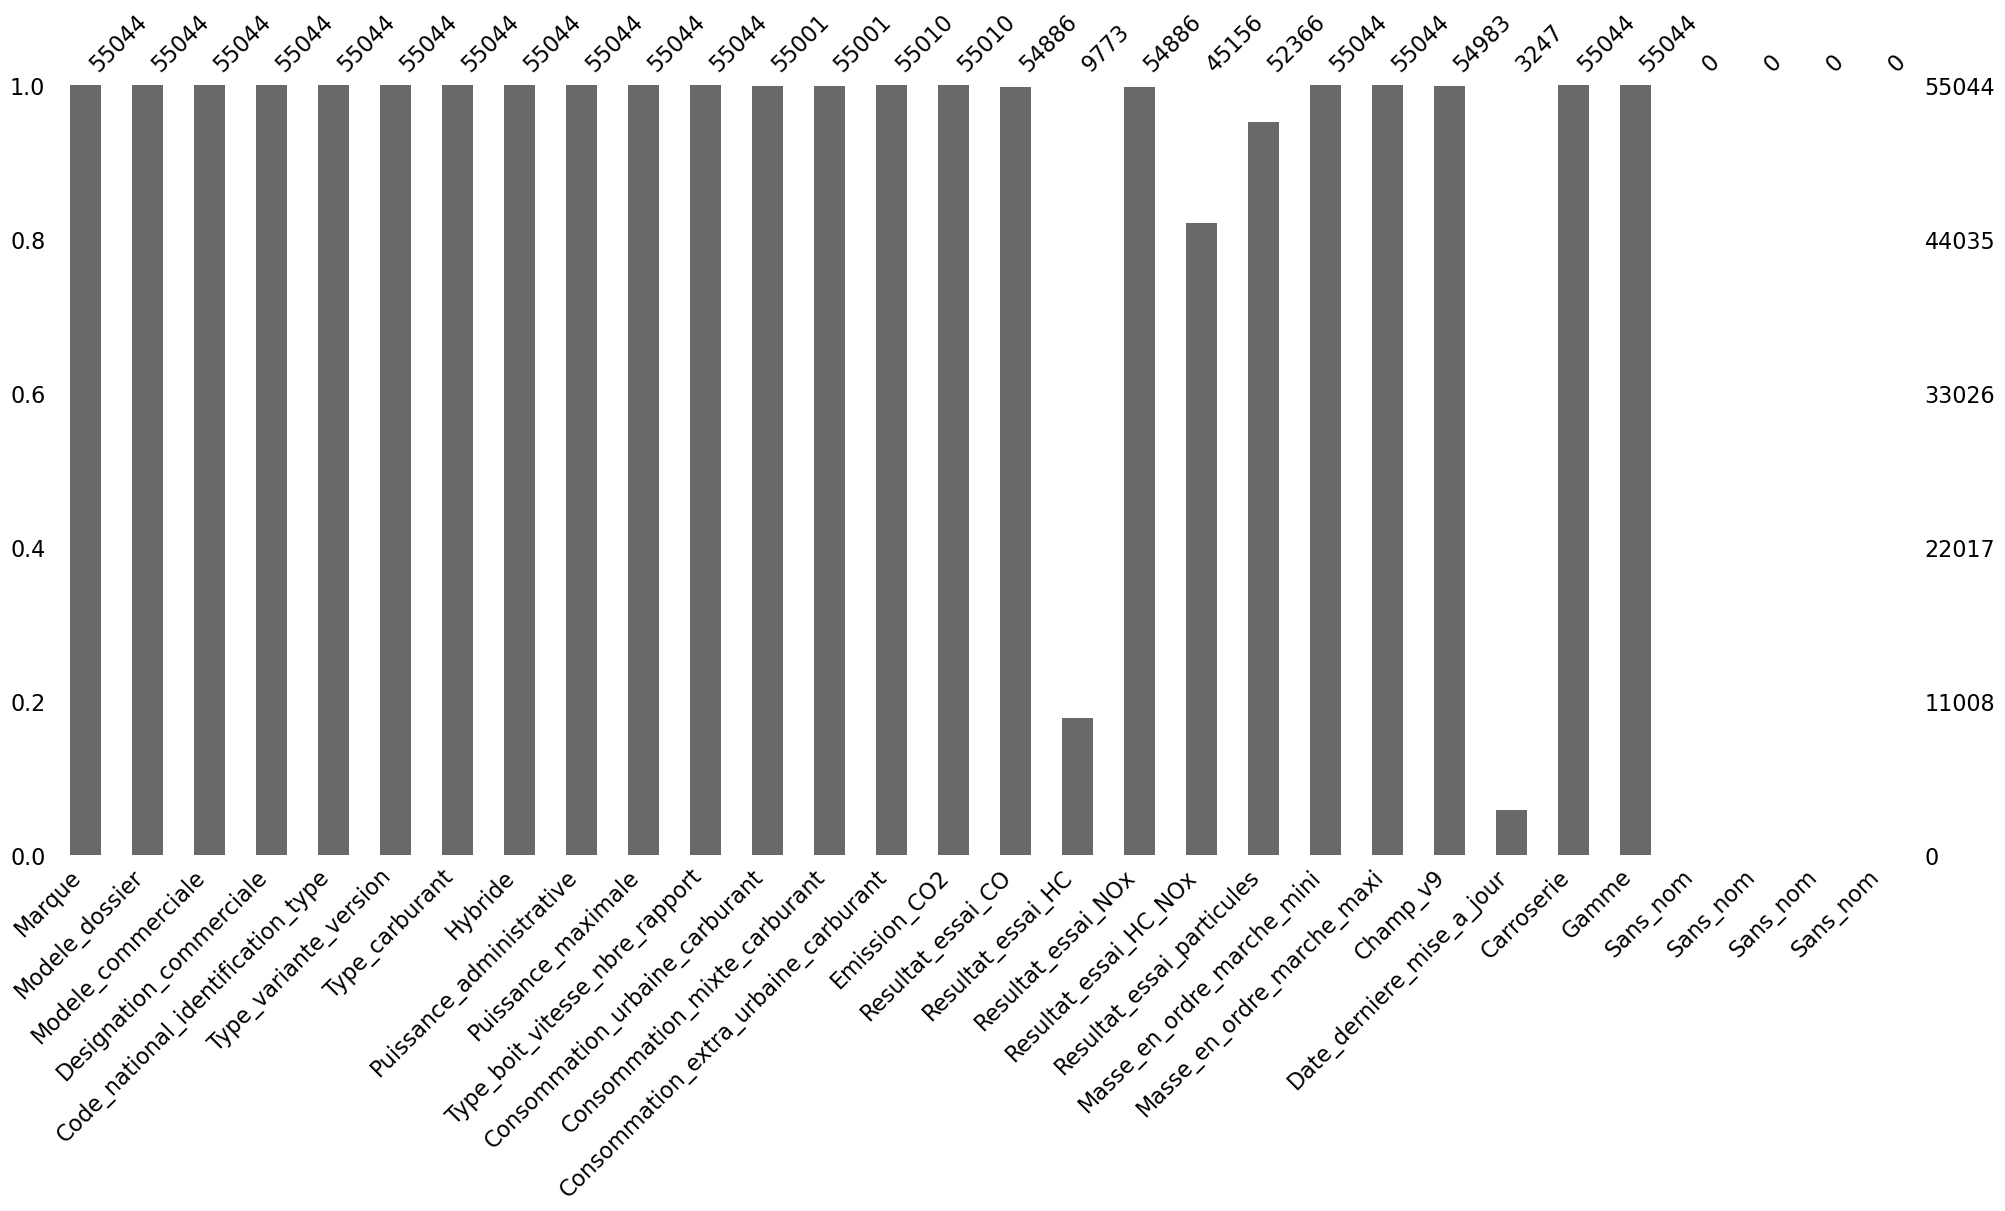

In [4]:
# Visualiser les valeurs manquantes avec Missingno
msno.bar(data)
plt.show()

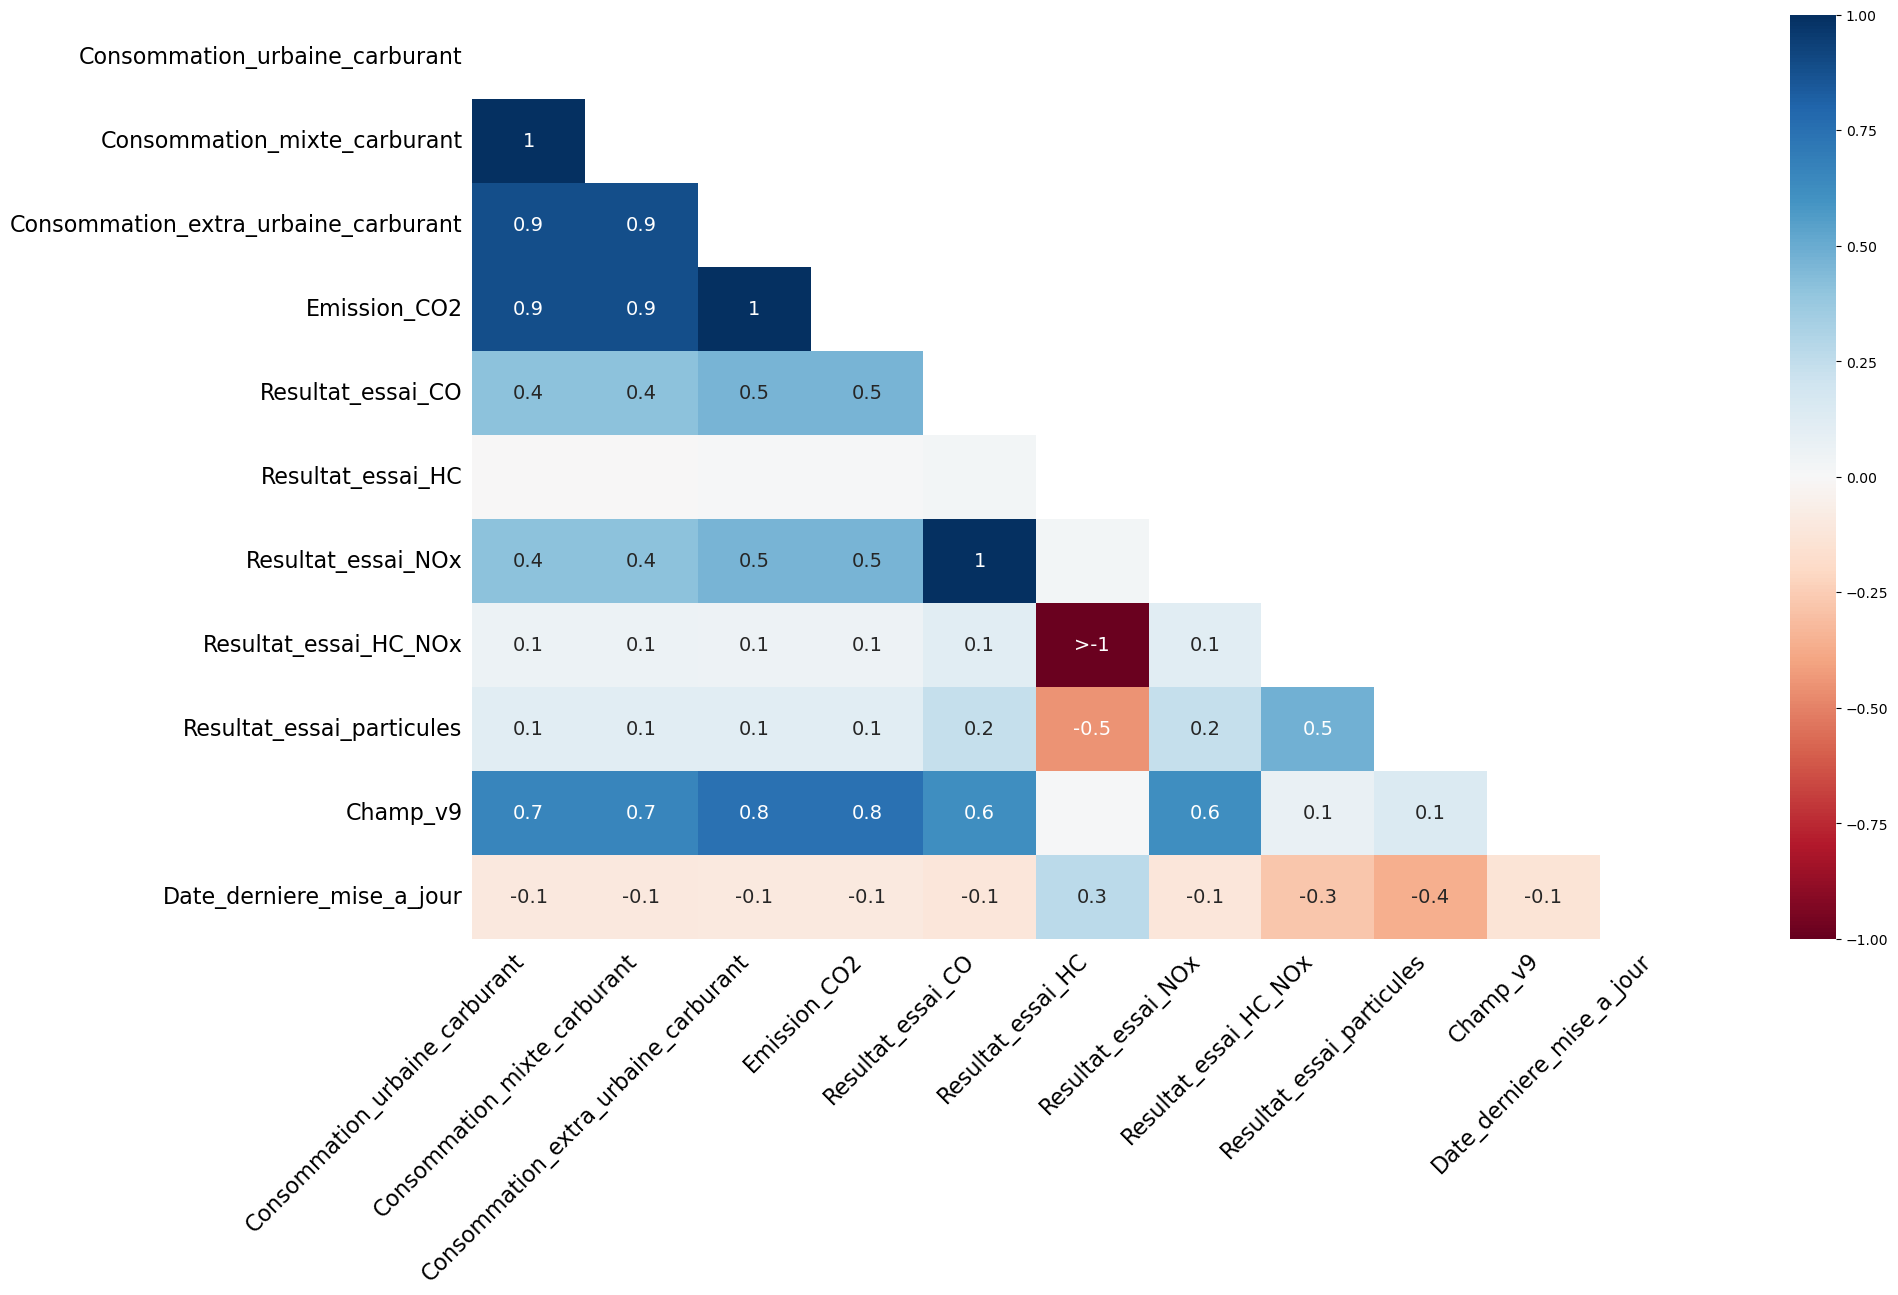

In [5]:
# Analyse de la correlation entre les valeurs manquantes avec la matrice de cor
msno.heatmap(data)

plt.show()

In [43]:
# Valeurs manquantes
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing values': missing_values, 'Percentage': missing_percent})
print(missing_table)
print(data.info())

                                      Missing values  Percentage
Marque                                             0    0.000000
Modele_dossier                                     0    0.000000
Modele_commerciale                                 0    0.000000
Designation_commerciale                            0    0.000000
Code_national_identification_type                  0    0.000000
Type_variante_version                              0    0.000000
Type_carburant                                     0    0.000000
Hybride                                            0    0.000000
Puissance_administrative                           0    0.000000
Puissance_maximale                                 0    0.000000
Type_boit_vitesse_nbre_rapport                     0    0.000000
Consommation_urbaine_carburant                    43    0.078119
Consommation_mixte_carburant                      43    0.078119
Consommation_extra_urbaine_carburant              34    0.061769
Emission_CO2             

In [10]:
# Créer un imputer pour utiliser le mode
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

data['Consommation_urbaine_carburant_impute_mode'] = imputer_mode.fit_transform(data[['Consommation_urbaine_carburant']]).ravel()
data['Consommation_mixte_carburant_impute_mode'] = imputer_mode.fit_transform(data[['Consommation_mixte_carburant']]).ravel()
data['Consommation_extra_urbaine_carburant_impute_mode'] = imputer_mode.fit_transform(data[['Consommation_extra_urbaine_carburant']]).ravel()
data['Emission_CO2_impute_median'] = imputer_median.fit_transform(data[['Emission_CO2']]).ravel()
data['Resultat_essai_CO_impute_mode'] = imputer_mode.fit_transform(data[['Resultat_essai_CO']]).ravel()
data['Resultat_essai_NOx_impute_mode'] = imputer_mode.fit_transform(data[['Resultat_essai_NOx']]).ravel()
data['Resultat_essai_HC_NOx_impute_mode'] = imputer_mode.fit_transform(data[['Resultat_essai_HC_NOx']]).ravel()
data['Resultat_essai_particules_impute_mode'] = imputer_mode.fit_transform(data[['Resultat_essai_particules']]).ravel()
data['Champ_v9_impute_mode'] = imputer_mode.fit_transform(data[['Champ_v9']]).ravel()


# Vérifier s'il y a encore des valeurs manquantes après l'imputation
print(data.isnull().mean())

Marque                                              0.000000
Modele_dossier                                      0.000000
Modele_commerciale                                  0.000000
Designation_commerciale                             0.000000
Code_national_identification_type                   0.000000
Type_variante_version                               0.000000
Type_carburant                                      0.000000
Hybride                                             0.000000
Puissance_administrative                            0.000000
Puissance_maximale                                  0.000000
Type_boit_vitesse_nbre_rapport                      0.000000
Consommation_urbaine_carburant                      0.000781
Consommation_mixte_carburant                        0.000781
Consommation_extra_urbaine_carburant                0.000618
Emission_CO2                                        0.000618
Resultat_essai_CO                                   0.002870
Resultat_essai_HC       

In [11]:
# Copie et suppression des variables inutiles du dataframe
data_copy = data.copy()
data_to_drop = ['Consommation_urbaine_carburant', 'Consommation_mixte_carburant', 'Consommation_extra_urbaine_carburant', 'Emission_CO2', 'Resultat_essai_CO', 'Resultat_essai_HC', 'Resultat_essai_NOx', 'Resultat_essai_HC_NOx', 'Resultat_essai_particules', 'Champ_v9', 'Date_derniere_mise_a_jour', 'Sans_nom']
data_copy.drop(columns=data_to_drop, inplace=True)
print(data_copy.isnull().mean())

Marque                                              0.0
Modele_dossier                                      0.0
Modele_commerciale                                  0.0
Designation_commerciale                             0.0
Code_national_identification_type                   0.0
Type_variante_version                               0.0
Type_carburant                                      0.0
Hybride                                             0.0
Puissance_administrative                            0.0
Puissance_maximale                                  0.0
Type_boit_vitesse_nbre_rapport                      0.0
Masse_en_ordre_marche_mini                          0.0
Masse_en_ordre_marche_maxi                          0.0
Carroserie                                          0.0
Gamme                                               0.0
Consommation_urbaine_carburant_impute_mode          0.0
Consommation_mixte_carburant_impute_mode            0.0
Consommation_extra_urbaine_carburant_impute_mode

In [15]:
# Résumé statistique des variables
data_copy.describe(include='all')

,Marque,Modele_dossier,Modele_commerciale,Designation_commerciale,Code_national_identification_type,Type_variante_version,Type_carburant,Hybride,Puissance_administrative,Puissance_maximale,...,Gamme,Consommation_urbaine_carburant_impute_mode,Consommation_mixte_carburant_impute_mode,Consommation_extra_urbaine_carburant_impute_mode,Emission_CO2_impute_median,Resultat_essai_CO_impute_mode,Resultat_essai_NOx_impute_mode,Resultat_essai_HC_NOx_impute_mode,Resultat_essai_particules_impute_mode,Champ_v9_impute_mode
count,55044,55044,55044,55044,55044,55044,55044,55044,55044.000000,55044,...,55044,55044,55044,55044,55044.000000,55044,55044,55044,55044,55044
unique,46,483,434,3837,54982,35430,13,2,NaN,232,...,7,198,89,137,NaN,606,222,209,9,35
top,MERCEDES,VIANO,VIANO,VIANO 2.2 CDI,M10PELVP197A317,639/2LAA31305N2M3G2T37,GO,non,NaN,120,...,MOY-INFER,"8,899999619","6,900000095",8,NaN,"0,046","0,196999997","0,216000006","0,001","""715/2007*692/2008EURO5"
freq,36220,14031,14031,5874,2,4,49311,54655,NaN,19968,...,33438,3705,5639,5392,NaN,7791,7784,17596,30431,24040
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.551504,NaN,...,NaN,NaN,NaN,NaN,201.709069,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.126021,NaN,...,NaN,NaN,NaN,NaN,33.965881,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,...,NaN,NaN,NaN,NaN,193.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,...,NaN,NaN,NaN,NaN,205.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,...,NaN,NaN,NaN,NaN,216.000000,NaN,NaN,NaN,NaN,NaN
